# Paired Point Registration

In [40]:
# Import all the necessary toolbox for basic python development 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import spatialmath 
import scipy
import sys 
from sklearn.neighbors import NearestNeighbors
from spatialmath import *
from spatialmath.base import *
from scipy.spatial.transform import Rotation as R
from scipy.linalg import eigh

%matplotlib widget  


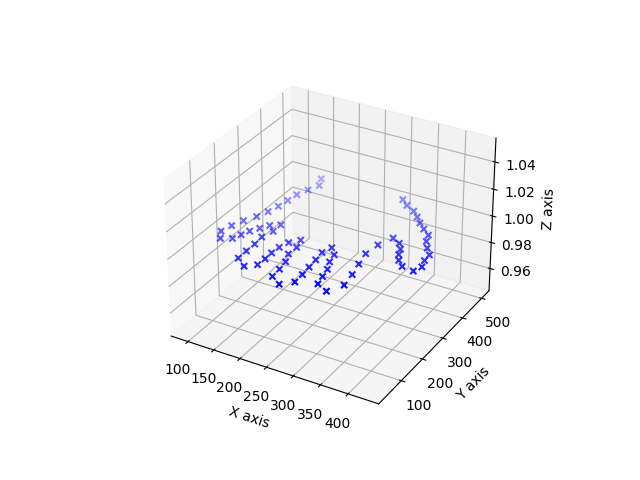

(72, 3)


In [41]:
# Let's define the vector "Hand"
Hand = np.array([
    [299.058823529412, 505.411764705882, 1],
    [314.470588235294, 485.470588235294, 1],
    [333.588235294118, 468.882352941176, 1],
    [348.058823529412, 448.176470588235, 1],
    [361.294117647059, 426.882352941176, 1],
    [376.176470588235, 406.058823529412, 1],
    [392.117647058824, 386.294117647059, 1],
    [398.647058823529, 358.882352941176, 1],
    [409.823529411765, 333.235294117647, 1],
    [423.058823529412, 308.411764705882, 1],
    [424.411764705882, 280.882352941176, 1],
    [430, 253.588235294118, 1],
    [424.294117647059, 228.117647058824, 1],
    [402.117647058824, 233.470588235294, 1],
    [388.470588235294, 253.058823529412, 1],
    [379.705882352941, 275.470588235294, 1],
    [374.058823529412, 298.588235294118, 1],
    [363.470588235294, 320.235294117647, 1],
    [346.823529411765, 334.235294117647, 1],
    [336, 289.647058823529, 1],
    [332.647058823529, 241.470588235294, 1],
    [338.823529411765, 193.941176470588, 1],
    [345.823529411765, 146.941176470588, 1],
    [350.588235294118, 99.2941176470588, 1],
    [335.647058823529, 57.7058823529412, 1],
    [313.117647058824, 74.9411764705882, 1],
    [308.176470588235, 107.058823529412, 1],
    [303.705882352941, 139.176470588235, 1],
    [295.058823529412, 169.647058823529, 1],
    [290.411764705882, 201.823529411765, 1],
    [275.764705882353, 226.352941176471, 1],
    [269.882352941176, 196.882352941176, 1],
    [272.705882352941, 161.764705882353, 1],
    [275.117647058824, 126.941176470588, 1],
    [277.705882352941, 91.8235294117647, 1],
    [278.823529411765, 56.4705882352941, 1],
    [261.058823529412, 31.1764705882353, 1],
    [239.529411764706, 51.9411764705882, 1],
    [237.529411764706, 86.4705882352941, 1],
    [234.058823529412, 121.058823529412, 1],
    [225.294117647059, 153.352941176471, 1],
    [225.764705882353, 188.294117647059, 1],
    [219.588235294118, 220.588235294118, 1],
    [207, 197.235294117647, 1],
    [201.529411764706, 168.352941176471, 1],
    [200.176470588235, 138.470588235294, 1],
    [201, 108.705882352941, 1],
    [200.117647058824, 78.7647058823529, 1],
    [184.058823529412, 58.1764705882353, 1],
    [162.647058823529, 81.5294117647059, 1],
    [161.764705882353, 117.294117647059, 1],
    [161.705882352941, 153.058823529412, 1],
    [159.294117647059, 188.941176470588, 1],
    [165.764705882353, 223.705882352941, 1],
    [165.647058823529, 257.941176470588, 1],
    [150.705882352941, 243.058823529412, 1],
    [141.588235294118, 220.176470588235, 1],
    [132.117647058824, 197.588235294118, 1],
    [126.411764705882, 173.705882352941, 1],
    [120.470588235294, 149.647058823529, 1],
    [103.176470588235, 136.294117647059, 1],
    [91.4705882352941, 164.647058823529, 1],
    [96.7058823529412, 198.294117647059, 1],
    [104.823529411765, 231.588235294118, 1],
    [116.470588235294, 263.411764705882, 1],
    [124, 296.647058823529, 1],
    [129.235294117647, 330.941176470588, 1],
    [132.588235294118, 365.823529411765, 1],
    [135.470588235294, 400.823529411765, 1],
    [143.235294117647, 434.352941176471, 1],
    [151.647058823529, 466.941176470588, 1],
    [142.470588235294, 498.529411764706, 1]])

fig = plt.figure(2)      #create the figure
ax = fig.add_subplot(111, projection='3d')      #setup the 3D space

# Add the point to the figure
ax.scatter(Hand[:, 0], Hand[:, 1], Hand[:, 2], c='b', marker='x')    

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig)

print(Hand.shape)

In [42]:
# Create a transformation matrix with translation of:
# 1 along x
# 2 along y
# 3 along z
# and a rotation of 60 degrees around x

translation = SE3(1,2,3)

rotation = SE3.Rx(60, unit='deg')

T0 = translation * rotation

print(T0)
print(T0.A)

# Create P_source which is equal to Hand
# but transposed 
# and also add the homogenoues component 
P_source = np.zeros((4, 72))
P_source[0,:] = Hand[:,0]
P_source[1,:] = Hand[:,1]
P_source[2,:] = Hand[:,2]
P_source[3,:] = 1

# Multiply T0 and P_source to obtain P_end (end point cloud) 
P_end = np.dot(T0,P_source)

# Exctract the array of points transposed back and without the homogenous component
PB = np.zeros((72,3))
PB[:,0] =  P_source[0,:]
PB[:,1] =  P_source[1,:]
PB[:,2] =  P_source[2,:]

   1         0         0         1         
   0         0.5      -0.866     2         
   0         0.866     0.5       3         
   0         0         0         1         

[[ 1.         0.         0.         1.       ]
 [ 0.         0.5       -0.8660254  2.       ]
 [ 0.         0.8660254  0.5        3.       ]
 [ 0.         0.         0.         1.       ]]


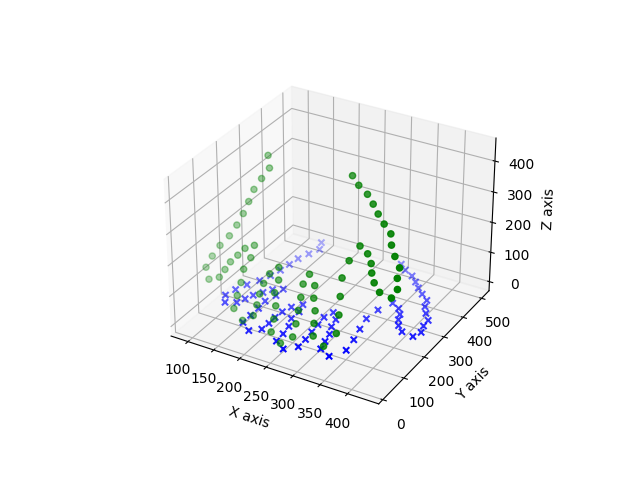

In [43]:
fig = plt.figure(3)      #create the figure
ax = fig.add_subplot(111, projection='3d')      #setup the 3D space

# Add the point to the figure

ax.scatter(P_source[0,:], P_source[1,:], P_source[2,:], c='b', marker='x')    
ax.scatter(P_end[0,:], P_end[1,:], P_end[2,:], c='g', marker='o')   

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig)


## Point Registration function 

In [44]:
def point_registration(P_source, P_end):
    # Ensure inputs are numpy arrays
    P_source = np.array(P_source)
    P_end = np.array(P_end)
    
    # Remove the homogeneous coordinate (the last row)
    P_source = P_source[:3, :]
    P_end = P_end[:3, :]
    
    # Number of points
    n_points = P_source.shape[1]
    
    # Calculate the centroids
    Ba = np.mean(P_source, axis=1, keepdims=True)
    Bb = np.mean(P_end, axis=1, keepdims=True)
    
    # Cross-correlation matrix
    cross_matrix = np.zeros((3, 3))
    for i in range(n_points):
        cross_matrix += np.outer(P_source[:, i] - Ba[:, 0], P_end[:, i] - Bb[:, 0])
    cross_matrix /= n_points
    
    # Calculate the parameters for the quaternion extraction
    A = cross_matrix - cross_matrix.T
    D = np.array([A[1, 2], A[2, 0], A[0, 1]])
    Q = np.block([
        [np.trace(cross_matrix), D],
        [D[:, None], cross_matrix + cross_matrix.T - np.trace(cross_matrix) * np.eye(3)]
    ])
    
    # Eigenvalue and eigenvector extraction
    E_val, E_vec = eigh(Q)
    
    # Find the maximum eigenvalue and its corresponding eigenvector
    max_p = np.argmax(E_val)
    quat = E_vec[:, max_p]
    
    # Extract the rotation matrix
    T = np.eye(4)
    T[:3, :3] = quat_to_rotm(quat)
    
    # Calculate the translation component
    T[:3, 3] = (Bb[:, 0] - T[:3, :3].dot(Ba[:, 0]))
    
    return T

def quat_to_rotm(quat):
    # Convert a quaternion into a rotation matrix
    w, x, y, z = quat
    return np.array([
        [1 - 2 * (y**2 + z**2), 2 * (x * y - z * w), 2 * (x * z + y * w)],
        [2 * (x * y + z * w), 1 - 2 * (x**2 + z**2), 2 * (y * z - x * w)],
        [2 * (x * z - y * w), 2 * (y * z + x * w), 1 - 2 * (x**2 + y**2)]
    ])


In [45]:
# Compute the point registrationi algorithm and find the T_matrix
T_matrix = point_registration(P_source, P_end)

# Print the original matrix T0 and the retrieved matrix and compare them:
print("Original Transformation matrix:")
print(T0)
print("Estimated Transformation matrix:")
print(T_matrix)


Original Transformation matrix:
   1         0         0         1         
   0         0.5      -0.866     2         
   0         0.866     0.5       3         
   0         0         0         1         

Estimated Transformation matrix:
[[ 1.00000000e+00 -1.10159412e-16 -2.59096892e-16  1.00000000e+00]
 [-1.69304785e-16  5.00000000e-01 -8.66025404e-01  2.00000000e+00]
 [ 2.24949295e-16  8.66025404e-01  5.00000000e-01  3.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [46]:
# Create Hand_T which is equal to Hand 
# but transposed 
# and also add the homogenoues component 
Hand_T = np.zeros((4,72))
Hand_T[0,:] =  Hand[:, 0]
Hand_T[1,:] =  Hand[:, 1]
Hand_T[2,:] =  Hand[:, 2]
Hand_T[3,:] =  1

#print Hand_T shape
print(Hand_T.shape)
#print Hand values
print(Hand)

(4, 72)
[[299.05882353 505.41176471   1.        ]
 [314.47058824 485.47058824   1.        ]
 [333.58823529 468.88235294   1.        ]
 [348.05882353 448.17647059   1.        ]
 [361.29411765 426.88235294   1.        ]
 [376.17647059 406.05882353   1.        ]
 [392.11764706 386.29411765   1.        ]
 [398.64705882 358.88235294   1.        ]
 [409.82352941 333.23529412   1.        ]
 [423.05882353 308.41176471   1.        ]
 [424.41176471 280.88235294   1.        ]
 [430.         253.58823529   1.        ]
 [424.29411765 228.11764706   1.        ]
 [402.11764706 233.47058824   1.        ]
 [388.47058824 253.05882353   1.        ]
 [379.70588235 275.47058824   1.        ]
 [374.05882353 298.58823529   1.        ]
 [363.47058824 320.23529412   1.        ]
 [346.82352941 334.23529412   1.        ]
 [336.         289.64705882   1.        ]
 [332.64705882 241.47058824   1.        ]
 [338.82352941 193.94117647   1.        ]
 [345.82352941 146.94117647   1.        ]
 [350.58823529  99.2941176

In [49]:
# Multiply Hand_T and the matrix computed with the PPR method
P_source_new = np.dot(T_matrix, Hand_T)

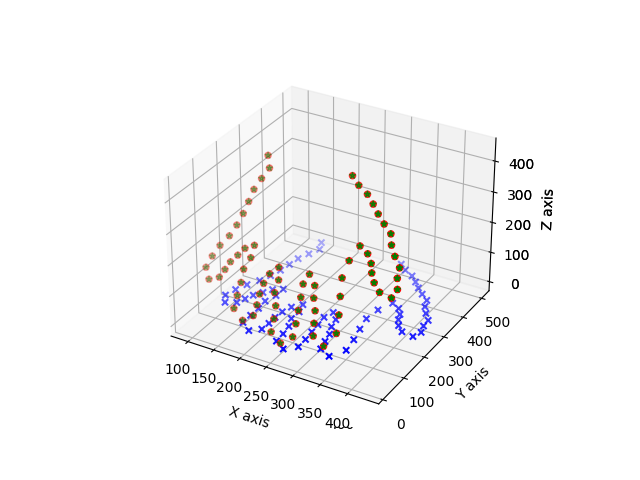

(72, 3)


In [50]:
fig = plt.figure(4)      #create the figure
ax = fig.add_subplot(111, projection='3d')      #setup the 3D space

# Add the point to the figure
ax.scatter(P_source[0,:], P_source[1,:], P_source[2,:], c='b', marker='x')    
ax.scatter(P_source_new[0,:], P_source_new[1,:], P_source_new[2,:], c='r', marker='o')  
ax.scatter(P_end[0,:], P_end[1,:], P_end[2,:], c='g', marker='*')    

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig)

print(Hand.shape)